In [3]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns 
from tabulate import tabulate               
import matplotlib as mat 

In [4]:
income_df = pd.read_excel("DS1_C5_S1_Income_Data_Challenge.xlsx")
income_df

,Age,WorkClass,Education,Education_Num,Marital_Status,Occupation,Relationship,Gender,Hours_Per_Week,Native_Country,Income_Bracket
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,40,United-States,<=50K
1,50,Self-emp,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,Female,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,Male,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,Female,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,Male,20,United-States,<=50K


TASK 1

In [5]:
##displaying all the columns that dataframe income_df contains
income_df.columns

Index(['Age', 'WorkClass', 'Education', 'Education_Num', 'Marital_Status',
       'Occupation', 'Relationship', 'Gender', 'Hours_Per_Week',
       'Native_Country', 'Income_Bracket'],
      dtype='object')

In [6]:
##displaying dattypes of the columns
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   WorkClass       32561 non-null  object
 2   Education       32561 non-null  object
 3   Education_Num   32561 non-null  int64 
 4   Marital_Status  32561 non-null  object
 5   Occupation      32561 non-null  object
 6   Relationship    32561 non-null  object
 7   Gender          32561 non-null  object
 8   Hours_Per_Week  32561 non-null  int64 
 9   Native_Country  32561 non-null  object
 10  Income_Bracket  32561 non-null  object
dtypes: int64(3), object(8)
memory usage: 2.7+ MB


In [7]:
##displaying the count of missing values
income_df.isnull().sum()

Age               0
WorkClass         0
Education         0
Education_Num     0
Marital_Status    0
Occupation        0
Relationship      0
Gender            0
Hours_Per_Week    0
Native_Country    0
Income_Bracket    0
dtype: int64

TASK 2

In [8]:
income_df.nunique()

Age               73
WorkClass          9
Education         16
Education_Num     16
Marital_Status     7
Occupation        15
Relationship       6
Gender             2
Hours_Per_Week    94
Native_Country    42
Income_Bracket     2
dtype: int64

In [15]:
def seprate_data_types(income_df):
    categorical = []
    continuous = []
    for column in income_df.columns:                
        if income_df[column].nunique() < 70:  ##putting 35 here...its a hyperparameter here and can be changed     
                                                    
            categorical.append(column)
        else:
            continuous.append(column)
            
    return categorical, continuous 


categorical, continuous = seprate_data_types(income_df)         


from tabulate import tabulate
table = [categorical,  continuous]
print(tabulate({"Categorical":categorical,
                "continuous": continuous}, headers = ["categorical", "continuous"]))

categorical     continuous
--------------  --------------
WorkClass       Age
Education       Hours_Per_Week
Education_Num
Marital_Status
Occupation
Relationship
Gender
Native_Country
Income_Bracket


# TASK 3

In [17]:
##defining function for the descriptive analysis

def info_of_cat (col):
    print(f'Unique value in {col} are: {income_df[col].unique()}')
    print("-"*60)
    print(f"Mode of {col} is: {income_df[col].mode()[0]}")
    print("-"*60)
    print(f"No of missing values in {col} is: {income_df[col].isnull().sum()}")

In [37]:
## Occupation

info_of_cat("Occupation")

Unique value in Occupation are: [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
------------------------------------------------------------
Mode of Occupation is:  Prof-specialty
------------------------------------------------------------
No of missing values in Occupation is: 0


In [26]:
##Income_Bracket

info_of_cat("Income_Bracket")

Unique value in Income_Bracket are: [' <=50K' ' >50K']
------------------------------------------------------------
Mode of Income_Bracket is:  <=50K
------------------------------------------------------------
No of missing values in Income_Bracket is: 0


In [27]:
##Relationship

info_of_cat("Relationship")

Unique value in Relationship are: [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
------------------------------------------------------------
Mode of Relationship is:  Husband
------------------------------------------------------------
No of missing values in Relationship is: 0


In [28]:
##Marital_Status

info_of_cat("Marital_Status")

Unique value in Marital_Status are: [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
------------------------------------------------------------
Mode of Marital_Status is:  Married-civ-spouse
------------------------------------------------------------
No of missing values in Marital_Status is: 0


In [29]:
##WorkClass

info_of_cat("WorkClass")

Unique value in WorkClass are: [' State-gov' 'Self-emp' ' Private' ' Federal-gov' ' Local-gov' ' ?'
 ' Self-emp' ' Without-pay' ' Never-worked']
------------------------------------------------------------
Mode of WorkClass is:  Private
------------------------------------------------------------
No of missing values in WorkClass is: 0


In [30]:
##Education

info_of_cat("Education")

Unique value in Education are: [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
------------------------------------------------------------
Mode of Education is:  HS-grad
------------------------------------------------------------
No of missing values in Education is: 0


In [31]:
##Native_Country

info_of_cat("Native_Country")

Unique value in Native_Country are: [' United-States' ' Cuba' ' Jamaica' ' India' ' ?' ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany' ' Iran'
 ' Philippines' ' Italy' ' Poland' ' Columbia' ' Cambodia' ' Thailand'
 ' Ecuador' ' Laos' ' Taiwan' ' Haiti' ' Portugal' ' Dominican-Republic'
 ' El-Salvador' ' France' ' Guatemala' ' China' ' Japan' ' Yugoslavia'
 ' Peru' ' Outlying-US(Guam-USVI-etc)' ' Scotland' ' Trinadad&Tobago'
 ' Greece' ' Nicaragua' ' Vietnam' ' Hong' ' Ireland' ' Hungary'
 ' Holand-Netherlands']
------------------------------------------------------------
Mode of Native_Country is:  United-States
------------------------------------------------------------
No of missing values in Native_Country is: 0


In [32]:
##Gender

info_of_cat("Gender")

Unique value in Gender are: [' Male' ' Female']
------------------------------------------------------------
Mode of Gender is:  Male
------------------------------------------------------------
No of missing values in Gender is: 0


In [19]:
##Education_Num

info_of_cat("Education_Num")

Unique value in Education_Num are: [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
------------------------------------------------------------
Mode of Education_Num is: 9
------------------------------------------------------------
No of missing values in Education_Num is: 0


TASK 4

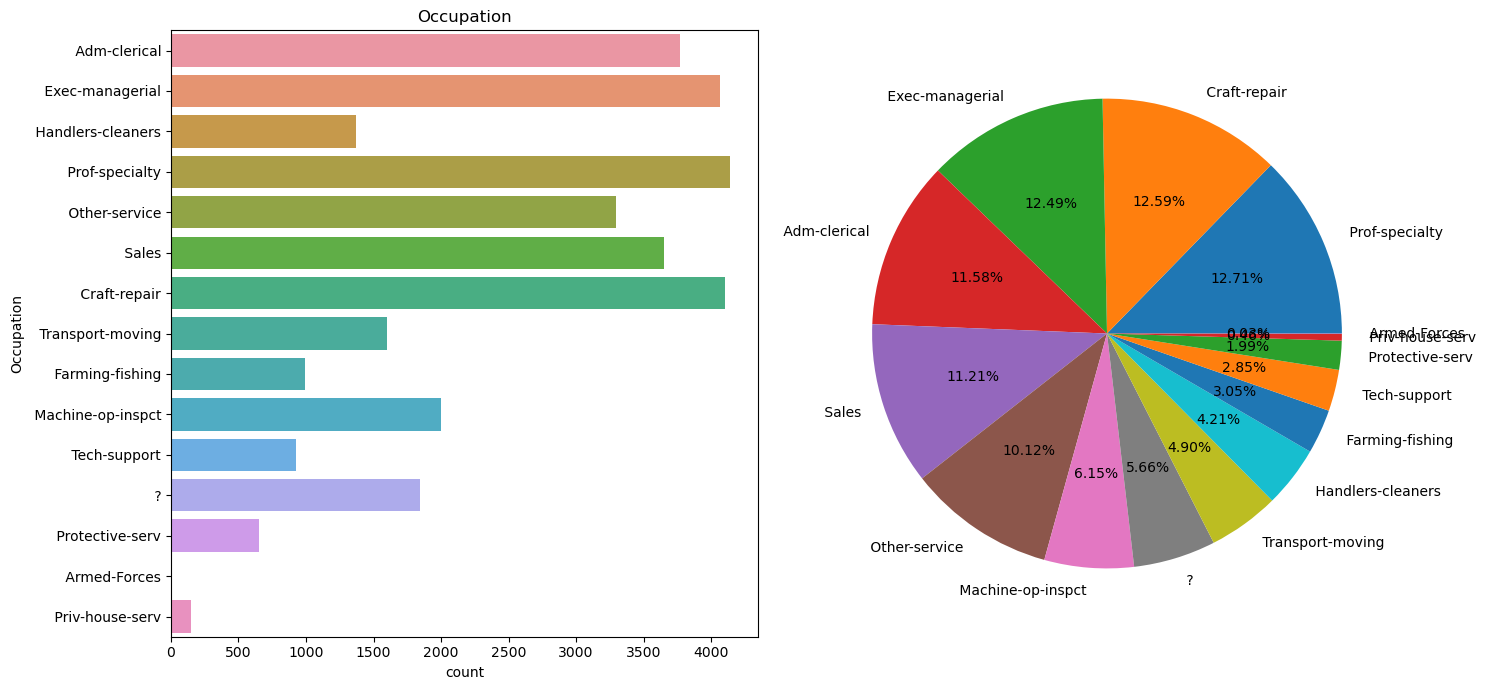

In [33]:
## Occupation

##plotting the reguired graph for descriptive analysis of data

fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Occupation")                  
percentage = income_df["Occupation"].value_counts()         
labels = list(income_df["Occupation"].value_counts().index) 

sns.countplot(y = income_df["Occupation"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  

plt.tight_layout()

In [ ]:
## Occupation

##plotting the reguired graph for descriptive analysis of data

fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Occupation")                  
percentage = income_df["Occupation"].value_counts()         
labels = list(income_df["Occupation"].value_counts().index) 

sns.countplot(y = income_df["Occupation"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  

plt.tight_layout()

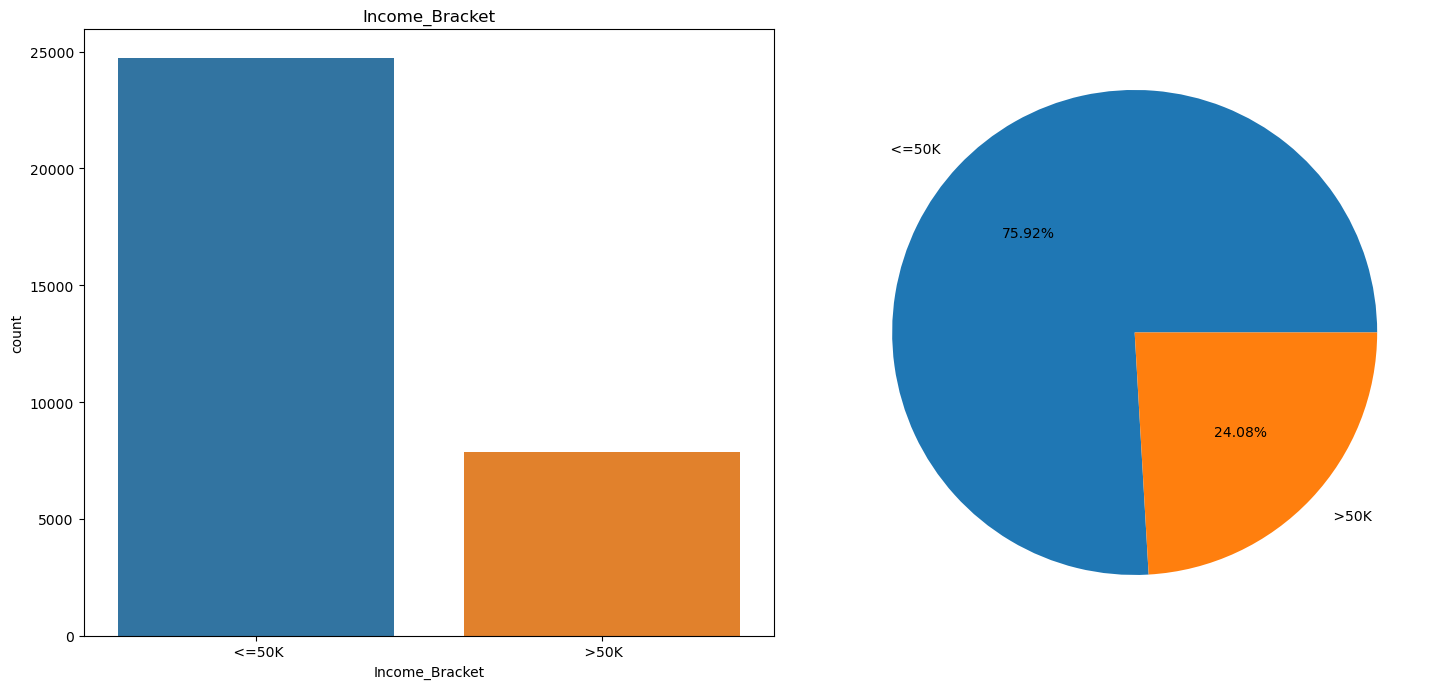

In [39]:
## Income_Bracket

##plotting the reguired graph for descriptive analysis of data

fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Income_Bracket")                  
percentage = income_df["Income_Bracket"].value_counts()         
labels = list(income_df["Income_Bracket"].value_counts().index) 

sns.countplot(x = income_df["Income_Bracket"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  

plt.tight_layout()

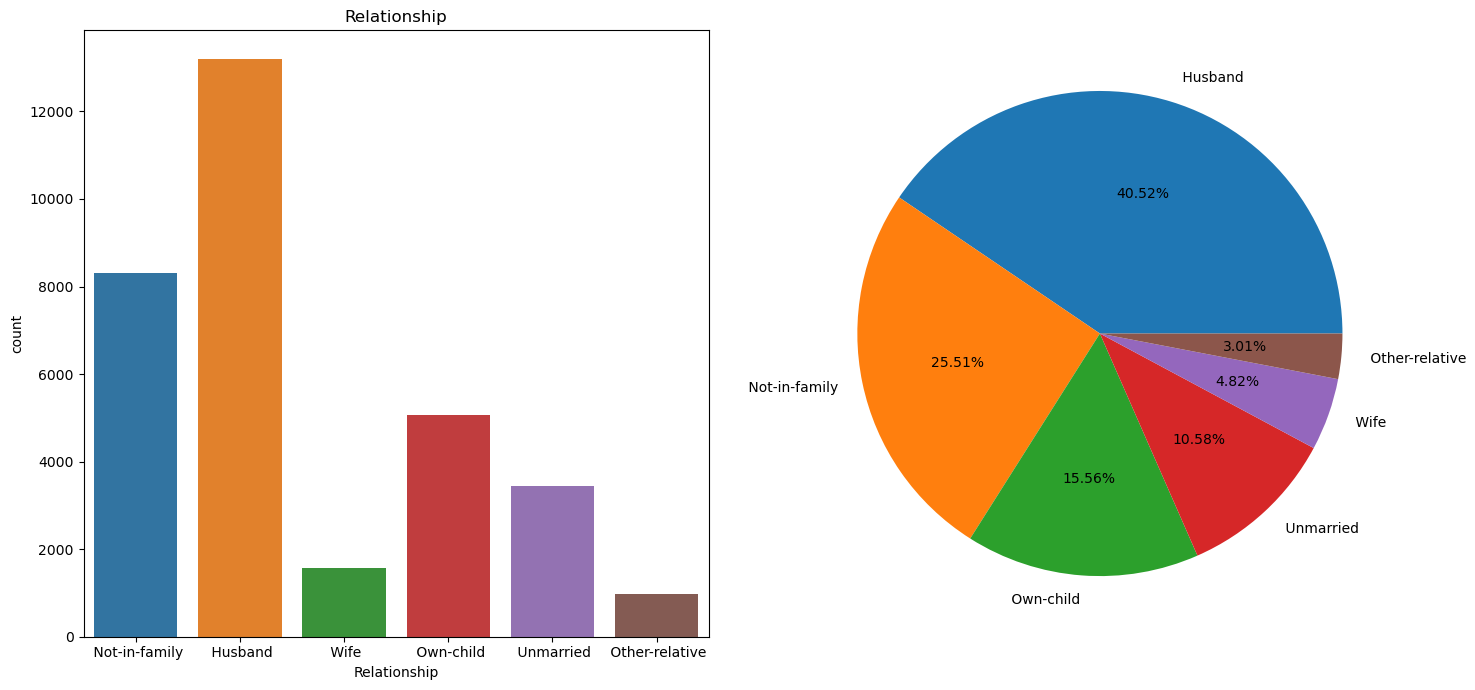

In [41]:
## Relationship

##plotting the reguired graph for descriptive analysis of data

fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Relationship")                  
percentage = income_df["Relationship"].value_counts()         
labels = list(income_df["Relationship"].value_counts().index) 

sns.countplot(x = income_df["Relationship"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  

plt.tight_layout()

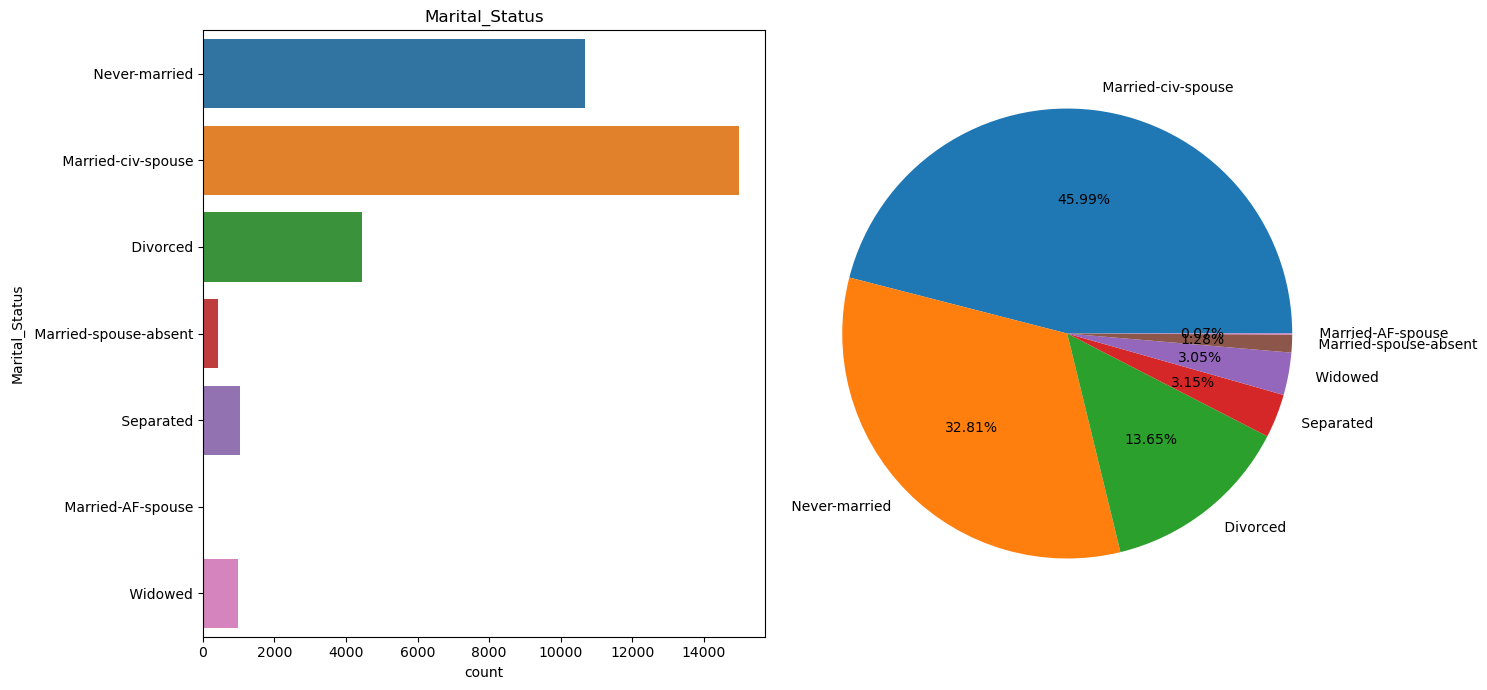

In [44]:
## Marital_Status

##plotting the reguired graph for descriptive analysis of data

fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Marital_Status")                  
percentage = income_df["Marital_Status"].value_counts()         
labels = list(income_df["Marital_Status"].value_counts().index) 

sns.countplot(y = income_df["Marital_Status"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  

plt.tight_layout()

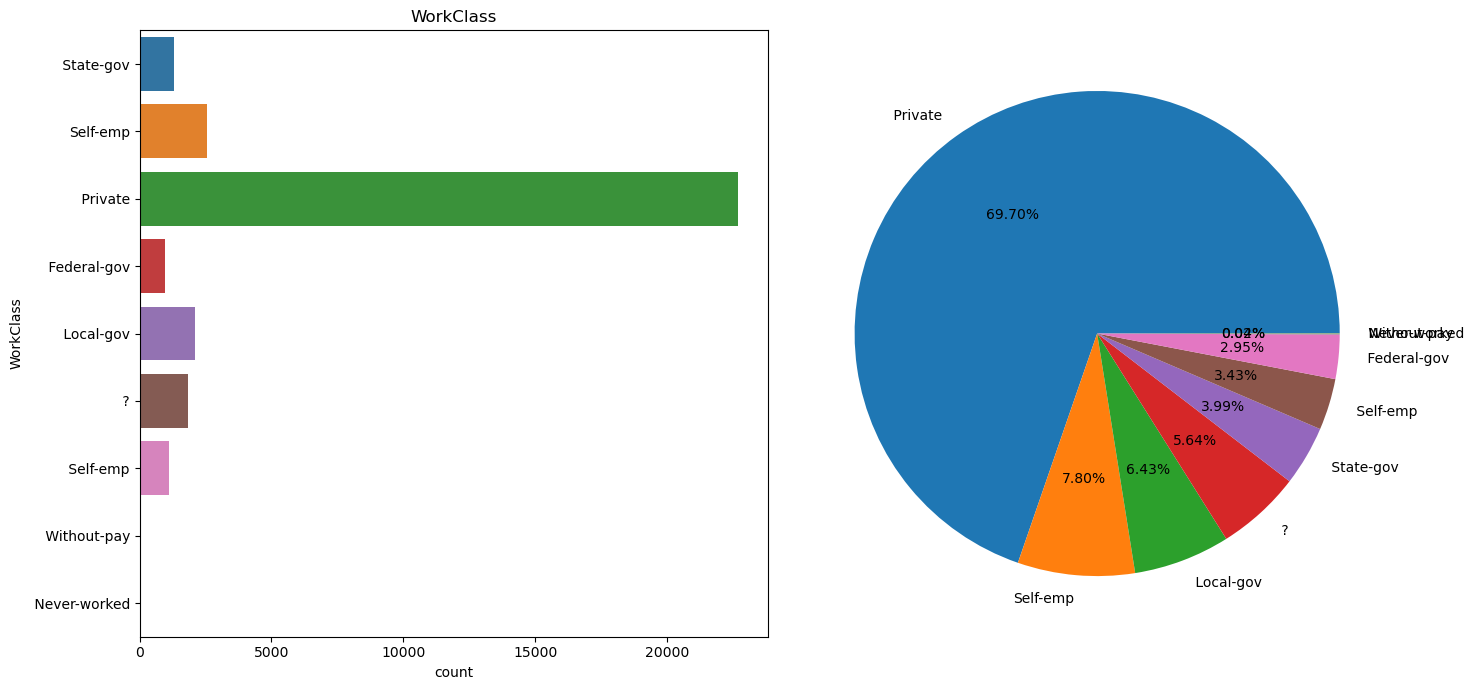

In [47]:
## WorkClass

##plotting the reguired graph for descriptive analysis of data

fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("WorkClass")                  
percentage = income_df["WorkClass"].value_counts()         
labels = list(income_df["WorkClass"].value_counts().index) 

sns.countplot(y = income_df["WorkClass"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  

plt.tight_layout()

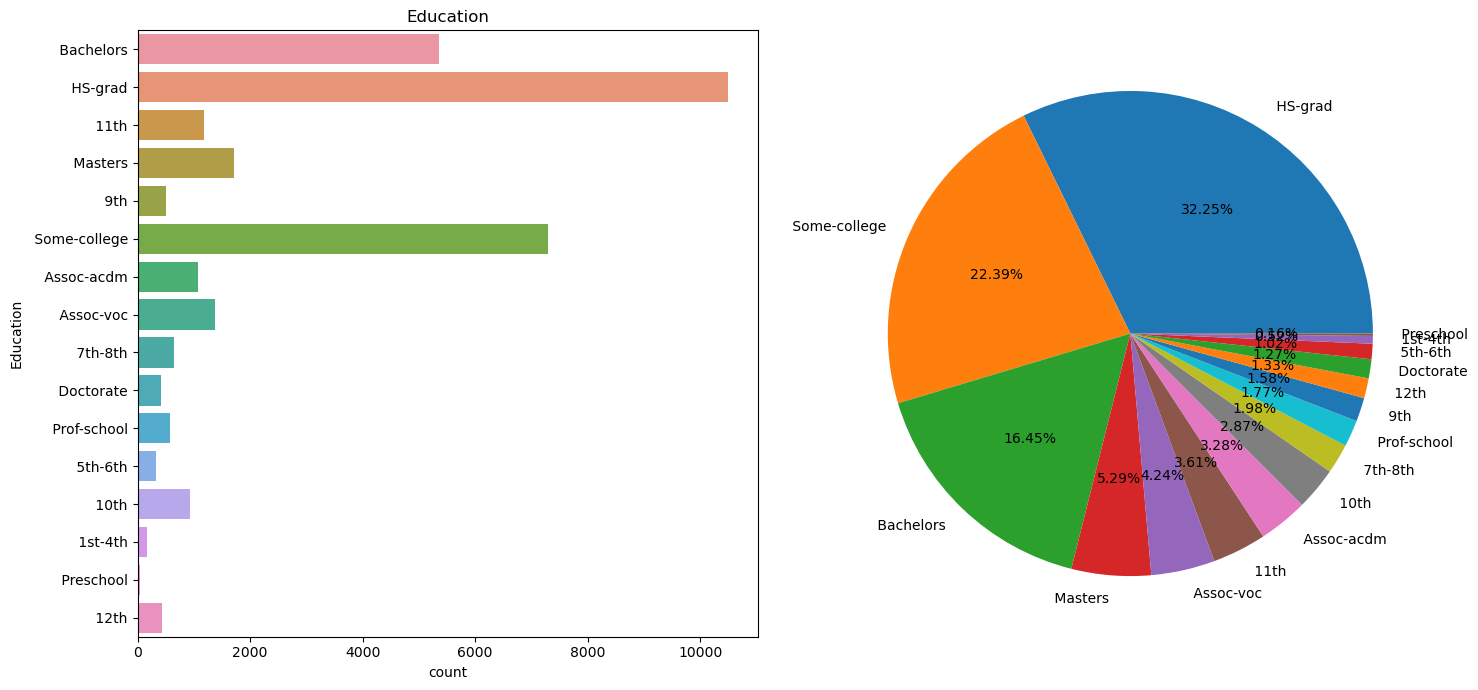

In [48]:
## Education

##plotting the reguired graph for descriptive analysis of data

fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Education")                  
percentage = income_df["Education"].value_counts()         
labels = list(income_df["Education"].value_counts().index) 

sns.countplot(y = income_df["Education"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  

plt.tight_layout()

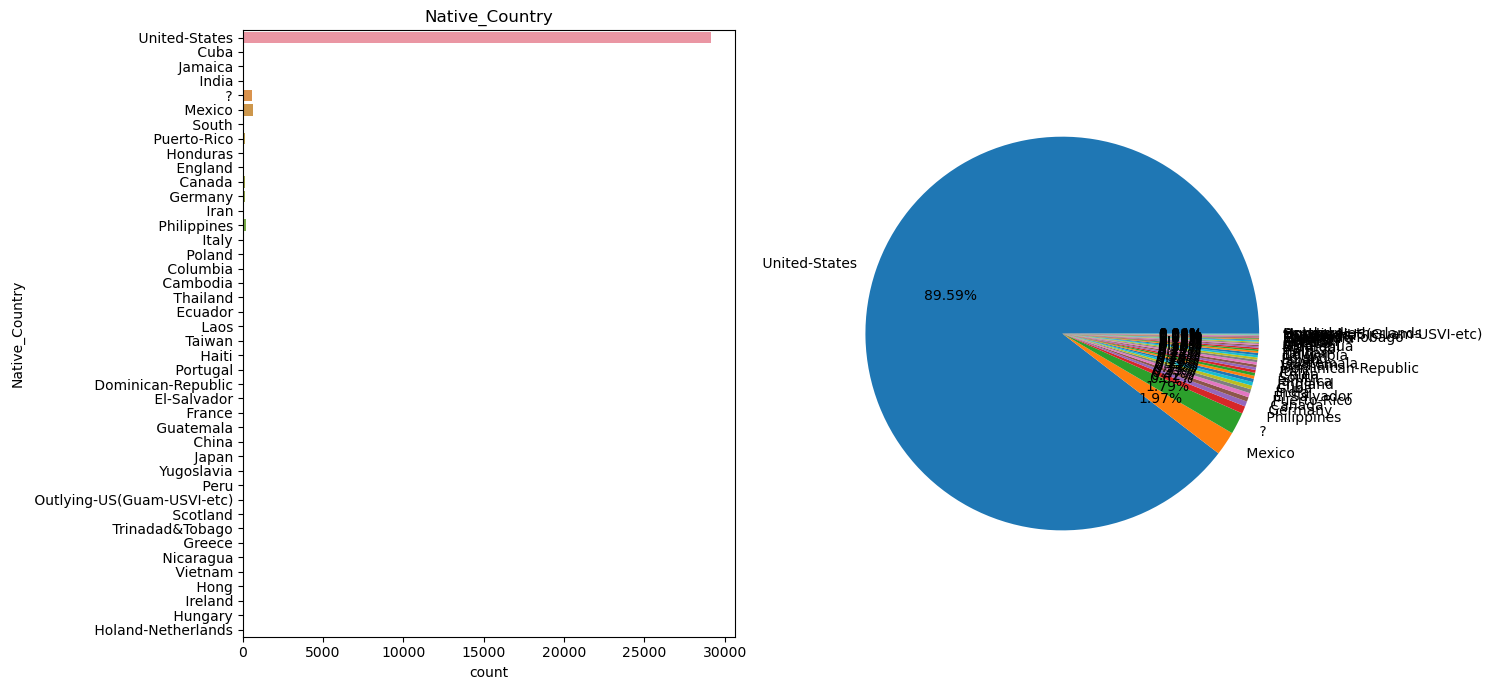

In [49]:
## Native_Country

##plotting the reguired graph for descriptive analysis of data

fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Native_Country")                  
percentage = income_df["Native_Country"].value_counts()         
labels = list(income_df["Native_Country"].value_counts().index) 

sns.countplot(y = income_df["Native_Country"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  

plt.tight_layout()

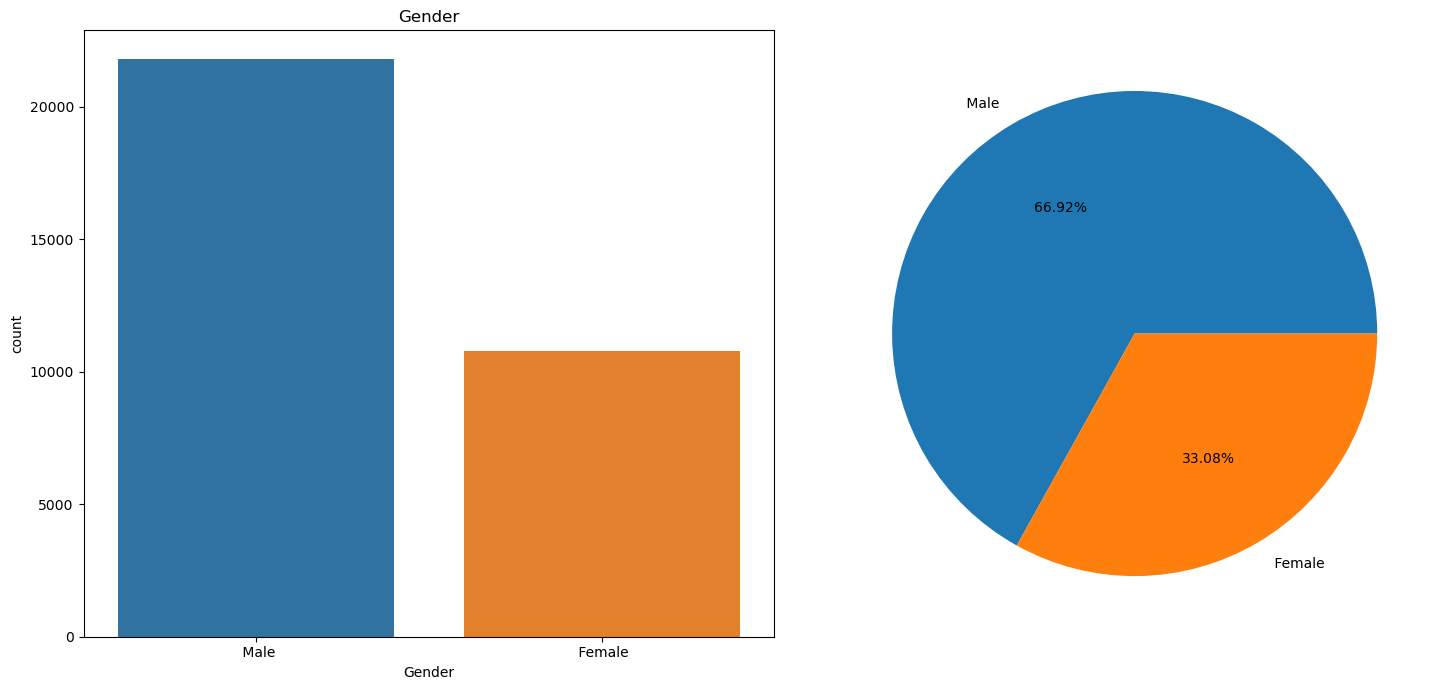

In [51]:
## Gender

##plotting the reguired graph for descriptive analysis of data

fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Gender")                  
percentage = income_df["Gender"].value_counts()         
labels = list(income_df["Gender"].value_counts().index) 

sns.countplot(x = income_df["Gender"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  

plt.tight_layout()

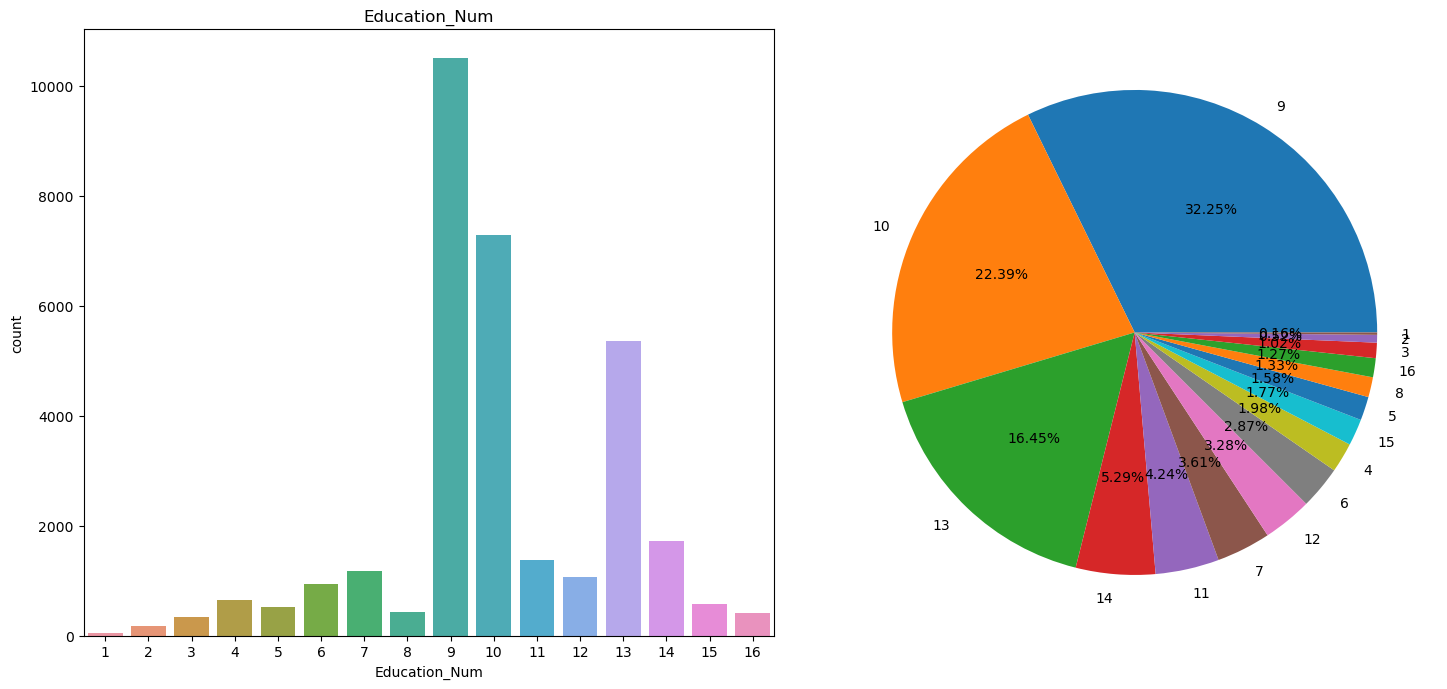

In [21]:
## Education_Num

##plotting the reguired graph for descriptive analysis of data

fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Education_Num")                  
percentage = income_df["Education_Num"].value_counts()         
labels = list(income_df["Education_Num"].value_counts().index) 

sns.countplot(x = income_df["Education_Num"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  

plt.tight_layout()

TASK 5

In [65]:
##defining the function for the descriptive analysis of numercal dataset

def info_of_numerical(col):
    print(f"The mean of the {col} is: {income_df[col].mean()}")
    print("-"*60)
    print(f"The median of the {col} is: {income_df[col].median()}")
    print("-"*60)
    print(f"The mode of the {col} is: {income_df[col].mode()[0]}")
    print("-"*60)
    print(f"The standard deviation of the {col} is: {income_df[col].std()}")
    print("-"*60)
    print(f"Number of missing values in the {col} is: {income_df[col].isnull().sum()}")
    print("-"*60)
    print(f"The Skewness of {col} is: {income_df[col].skew()}")

In [72]:
##Hours_Per_Week

info_of_numerical("Hours_Per_Week")

The mean of the Hours_Per_Week is: 40.437455852092995
------------------------------------------------------------
The median of the Hours_Per_Week is: 40.0
------------------------------------------------------------
The mode of the Hours_Per_Week is: 40
------------------------------------------------------------
The standard deviation of the Hours_Per_Week is: 12.34742868173081
------------------------------------------------------------
Number of missing values in the Hours_Per_Week is: 0
------------------------------------------------------------
The Skewness of Hours_Per_Week is: 0.22764253680450092


In [71]:
##Age

info_of_numerical("Age")

The mean of the Age is: 38.58164675532078
------------------------------------------------------------
The median of the Age is: 37.0
------------------------------------------------------------
The mode of the Age is: 36
------------------------------------------------------------
The standard deviation of the Age is: 13.640432553581146
------------------------------------------------------------
Number of missing values in the Age is: 0
------------------------------------------------------------
The Skewness of Age is: 0.5587433694130484


TASK 6

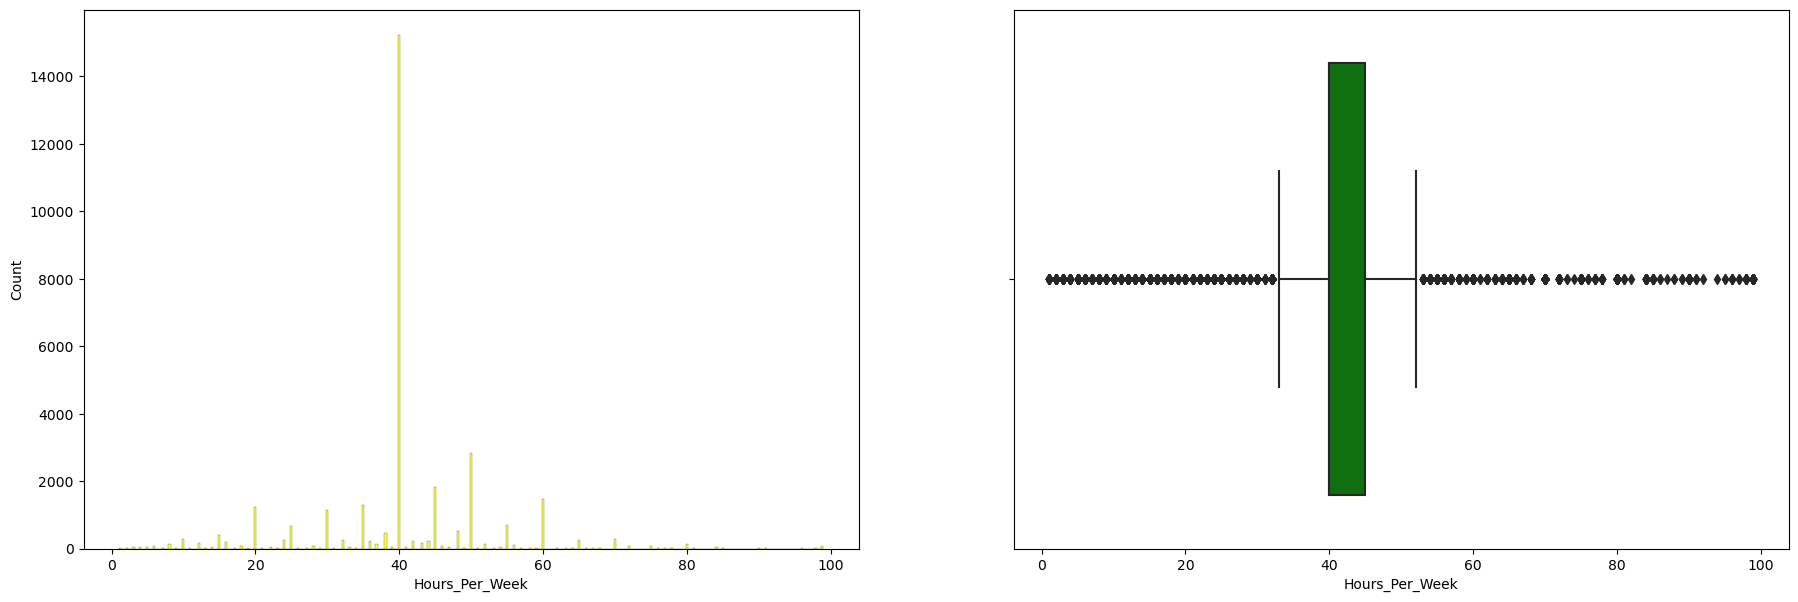

In [69]:
##Hours_Per_Week

##plotting the graph to represent the skewness of data

fig, ax = plt.subplots (1, 2, figsize = (22, 7))
sns.histplot(x = income_df['Hours_Per_Week'], ax = ax[0], color = 'yellow')
sns.boxplot(x = income_df['Hours_Per_Week'], ax = ax[1], color = 'green')
plt.show()

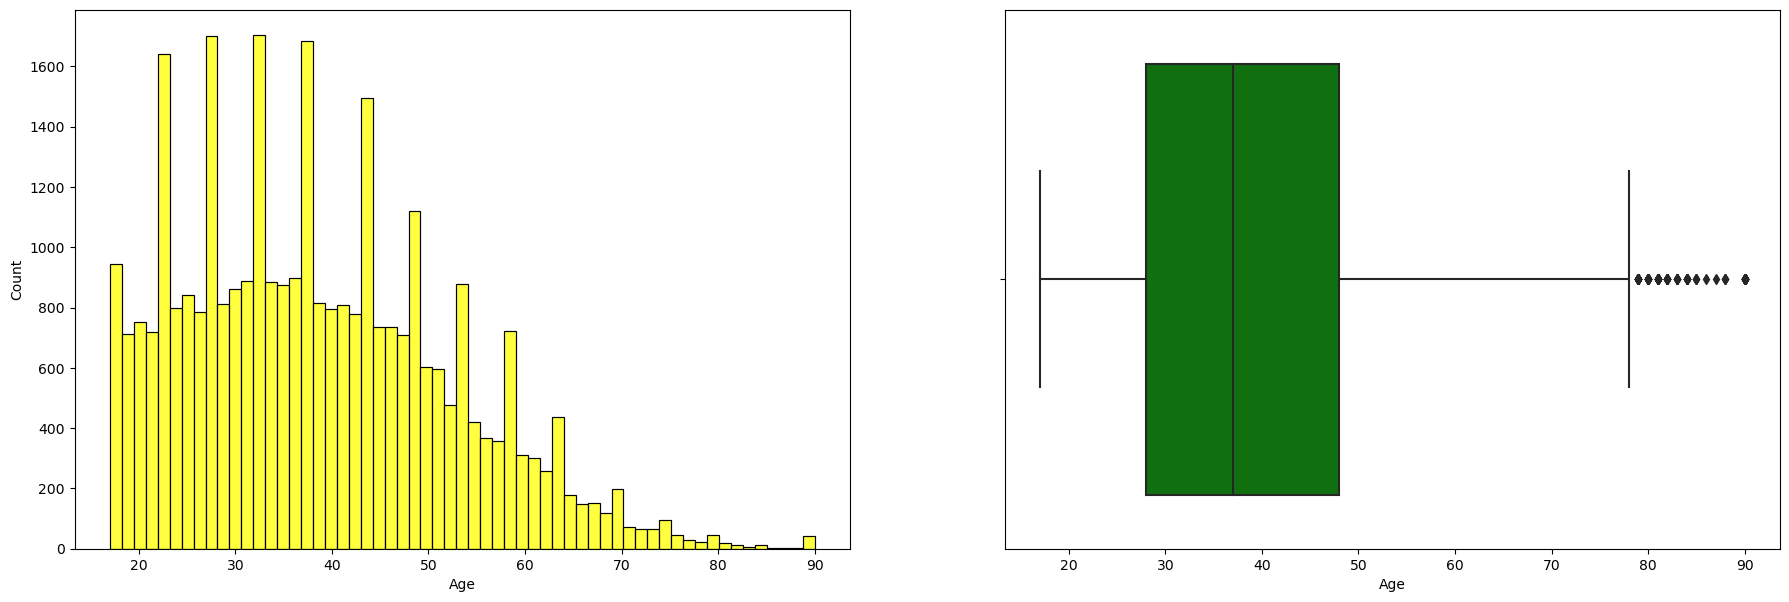

In [61]:
##Age

##plotting the graph to represent the skewness of data

fig, ax = plt.subplots (1, 2, figsize = (22, 7))
sns.histplot(x = income_df['Age'], ax = ax[0], color = 'yellow')
sns.boxplot(x = income_df['Age'], ax = ax[1], color = 'green')
plt.show()

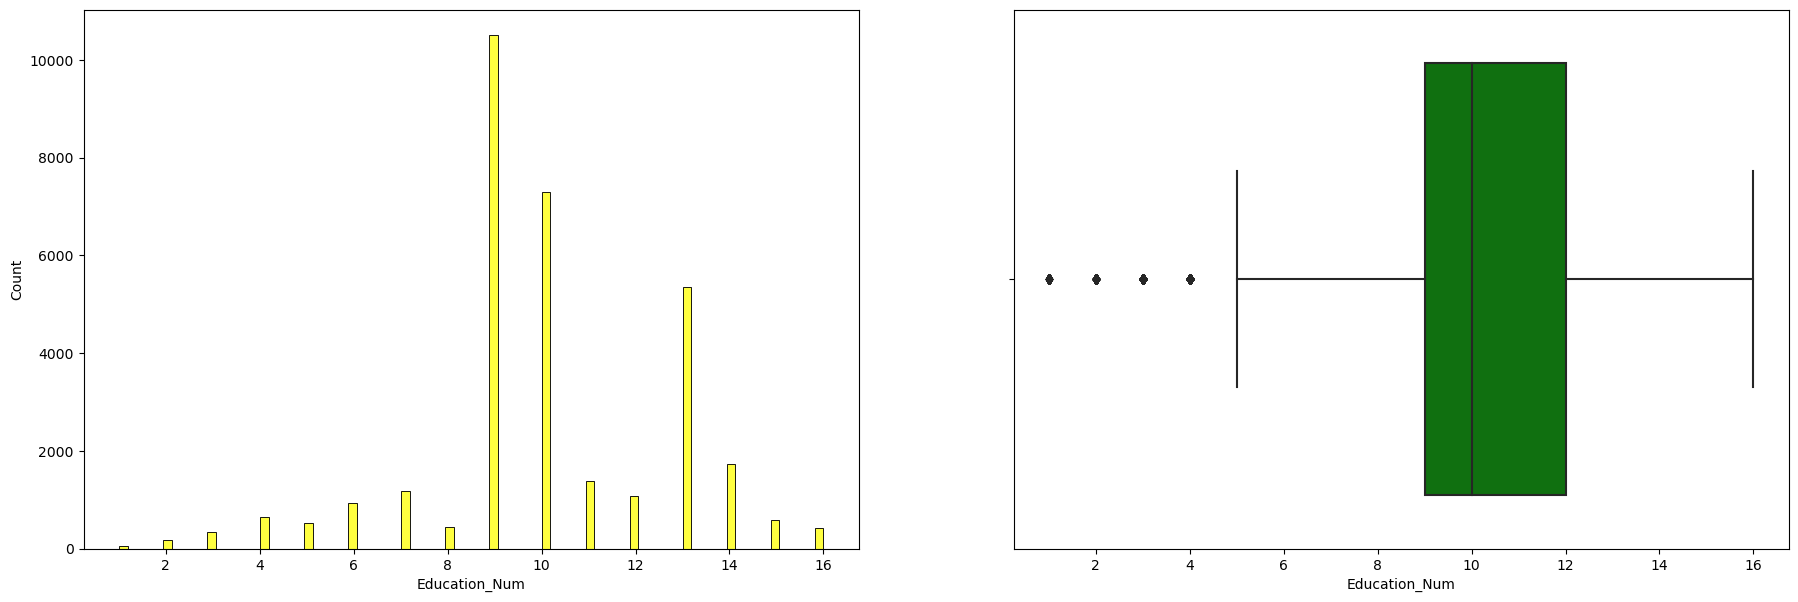

In [63]:
##Education_Num

##plotting the graph to represent the skewness of data

fig, ax = plt.subplots (1, 2, figsize = (22, 7))
sns.histplot(x = income_df['Education_Num'], ax = ax[0], color = 'yellow')
sns.boxplot(x = income_df['Education_Num'], ax = ax[1], color = 'green')
plt.show()